In [1]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")

sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

INFILE = "C:\\Users\\Owner\\Documents\\Northwestern\\Intro_MachineLearning\\Assignment1\\DataSet\\HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
dt = df.dtypes
#print( dt )

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print(i)
##
print("  ")
print(" NUMBERS ")
print(" ------- ")
for i in numList :
    print(i)

 OBJECTS 
 ------- 
REASON
JOB
  
 NUMBERS 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [2]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )
    x = g[ TARGET_F ].mean()
    print( "Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    print( "Default Amount", x )
    print(" ===============\n\n\n ")

 Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Default Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Default Amount REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
Default Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Default Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


In [3]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

In [4]:
dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )

In [5]:
g = df.groupby("IMP_JOB")
i = "MORTDUE"
print( g[i].median() )

IMP_JOB
MISSING    58936.0
Mgr        76600.0
Office     62970.5
Other      54834.0
ProfExe    82802.5
Sales      71800.0
Self       88465.0
Name: MORTDUE, dtype: float64


In [6]:
g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median() )

IMP_JOB
MISSING     78227.0
Mgr        101258.0
Office      89094.5
Other       76599.5
ProfExe    110007.0
Sales       84473.5
Self       130631.0
Name: VALUE, dtype: float64


In [7]:
g = df.groupby("IMP_REASON")
i = "NINQ"
print( g[i].median() )

IMP_REASON
DebtCon    1.0
HomeImp    0.0
MISSING    0.0
Name: NINQ, dtype: float64


In [8]:
i = "MORTDUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 58936
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 76600
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 62970
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 54834
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 82802
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 71800
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 88465
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 78227
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 101258
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 89094
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 76599
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 110007
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 84473
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 130631
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "NINQ"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 1
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 0
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 0

df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)



for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )

In [9]:
"""
Remove Outliers
"""

dt = df.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList :
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( df[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )

for i in objList:
    df = df.drop( i, axis=1 )

In [10]:
"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=2)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )

##print( "FLAG DATA" )
##print( "TRAINING = ", X_train.shape )
##print( "TEST = ", X_test.shape )


F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

#print( Z_train.describe() )
#print( Z_test.describe() )
#print( "\n\n")

F = Z_train[ TARGET_A ] > 50000
Z_train.loc[ F, TARGET_A ] = 50000

F = Z_test[ TARGET_A ] > 50000
Z_test.loc[ F, [TARGET_A] ] = 50000

#print( Z_train.describe() )
#print( Z_test.describe() )
#print( "\n\n")


##print( " ====== ")
##
##print( "AMOUNT DATA" )
##print( "TRAINING = ", W_train.shape )
##print( "TEST = ", Z_test.shape )

In [11]:
"""
MODEL ACCURACY METRICS
"""

def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

In [12]:
##"""
##DECISION TREE
##"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

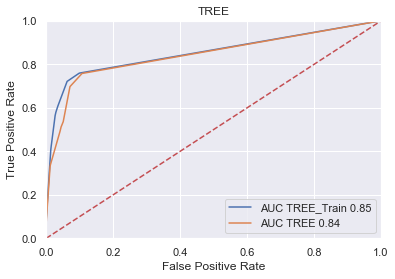

TREE CLASSIFICATION ACCURACY
TREE_Train  =  0.8949244966442953
TREE  =  0.8808724832214765
------


z_IMP_REASON_DebtCon
TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE
TRUNC_IMP_DEBTINC
M_VALUE
M_YOJ
M_DEROG
M_DEBTINC
TRUNC_IMP_MORTDUE
TRUNC_IMP_VALUE
TRUNC_IMP_YOJ
O_IMP_DELINQ


In [13]:
# Default Prob

WHO = "TREE"

CLM = tree.DecisionTreeClassifier( max_depth=4 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

feature_cols = list( X.columns.values )
tree.export_graphviz(CLM,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( CLM, feature_cols ) 

for i in vars_tree_flag :
   print( i )

In [14]:
# Loss Amt

AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )


TREE_CLM = TEST_CLM.copy()
TREE_AMT = TEST_AMT.copy()

for i in vars_tree_amt :
   print( i )

TREE RMSE ACCURACY
TREE_Train  =  4424.73705499347
TREE  =  6135.514689615248
------


TRUNC_IMP_CLAGE
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
M_DEBTINC
TRUNC_LOAN
TRUNC_IMP_NINQ
TRUNC_IMP_DEROG


In [15]:
"""
RANDOM FOREST
"""

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

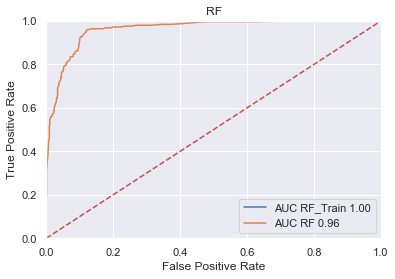

RF CLASSIFICATION ACCURACY
RF_Train  =  1.0
RF  =  0.910234899328859
------


('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 68)
('TRUNC_IMP_CLAGE', 46)
('TRUNC_LOAN', 38)
('TRUNC_IMP_DELINQ', 37)
('TRUNC_IMP_MORTDUE', 35)
('TRUNC_IMP_VALUE', 35)
('TRUNC_IMP_CLNO', 31)
('TRUNC_IMP_YOJ', 28)
('TRUNC_IMP_DEROG', 20)
('TRUNC_IMP_NINQ', 18)


In [16]:
WHO = "RF"

CLM = RandomForestClassifier( n_estimators = 200, random_state=1 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( CLM, feature_cols )

for i in vars_RF_flag :
   print( i )

In [17]:
# Loss Amt

AMT = RandomForestRegressor(n_estimators = 200, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
   print( i )

RF_CLM = TEST_CLM.copy()
RF_AMT = TEST_AMT.copy()

RF RMSE ACCURACY
RF_Train  =  1130.7701972664515
RF  =  3506.6713918019404
------


('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 9)
('TRUNC_IMP_DEBTINC', 5)
('M_DEBTINC', 5)


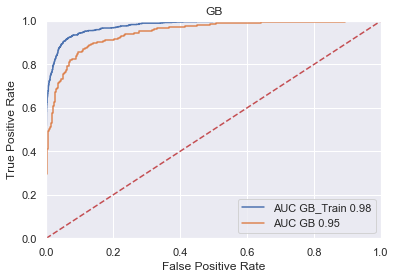

GB CLASSIFICATION ACCURACY
GB_Train  =  0.9406459731543624
GB  =  0.9085570469798657
------


('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 30)
('TRUNC_IMP_CLAGE', 19)
('TRUNC_IMP_DELINQ', 16)
('M_VALUE', 7)
('TRUNC_IMP_DEROG', 6)
('TRUNC_LOAN', 6)
('TRUNC_IMP_VALUE', 6)


In [18]:
"""
GRADIENT BOOSTING
"""

WHO = "GB"

CLM = GradientBoostingClassifier( random_state=1, n_estimators = 200 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( CLM, feature_cols )

for i in vars_GB_flag :
   print( i )

In [19]:
# Loss Amt

AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
   print( i )

GB_CLM = TEST_CLM.copy()
GB_AMT = TEST_AMT.copy()

GB RMSE ACCURACY
GB_Train  =  1121.0821681128123
GB  =  3177.9937332803356
------


('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 9)
('TRUNC_IMP_DEBTINC', 5)
('M_DEBTINC', 5)


In [20]:
#Regression Model Functions

def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nDefault")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )



def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nLoss Amt")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

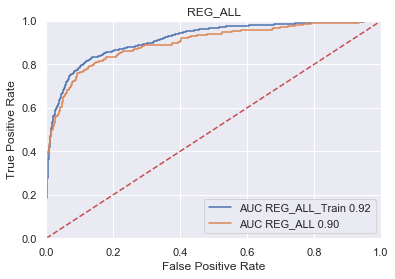

REG_ALL CLASSIFICATION ACCURACY
REG_ALL_Train  =  0.8947147651006712
REG_ALL  =  0.8825503355704698
------


REG_ALL RMSE ACCURACY
REG_ALL_Train  =  3084.1451401847994
REG_ALL  =  3926.760224661266
------



Default
---------
Total Variables:  40
INTERCEPT  =  -4.3677085463184735
z_IMP_REASON_DebtCon  =  -0.07954412980056023
z_IMP_REASON_HomeImp  =  0.02538615695188683
z_IMP_REASON_MISSING  =  -0.06960309792011798
z_IMP_JOB_MISSING  =  -1.8671690714103393
z_IMP_JOB_Mgr  =  0.2623351013117031
z_IMP_JOB_Office  =  -0.49957182853506105
z_IMP_JOB_Other  =  0.24402286746013785
z_IMP_JOB_ProfExe  =  -0.0489694548346355
z_IMP_JOB_Sales  =  1.306957438485048
z_IMP_JOB_Self  =  0.4786338767543616
M_MORTDUE  =  0.5074591319431931
M_VALUE  =  3.7604261160774004
M_NINQ  =  -0.11827267734310458
M_YOJ  =  -0.5545057122621682
M_DEROG  =  -1.6941417707104005
M_DELINQ  =  -0.26294120816388006
M_CLAGE  =  1.1351381258691913
M_CLNO  =  2.3330876675021397
M_DEBTINC  =  2.588724935953482
O_LOAN  =  0.03314

In [31]:
"""
REGRESSION ALL VARIABLES - Run the regression model on all the variables
Play around with the solver parameter when doing the assignment
"""

WHO = "REG_ALL"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# Loss Amt

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_ALL_CLM_COEF = getCoefLogit( CLM, X_train )
REG_ALL_AMT_COEF = getCoefLinear( AMT, X_train )

REG_ALL_CLM = TEST_CLM.copy()
REG_ALL_AMT = TEST_AMT.copy()

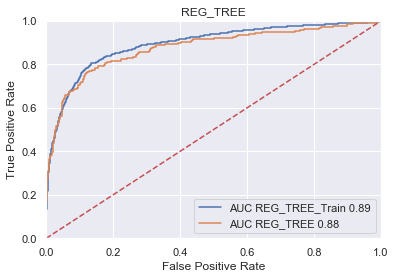

REG_TREE CLASSIFICATION ACCURACY
REG_TREE_Train  =  0.8808724832214765
REG_TREE  =  0.8833892617449665
------


REG_TREE RMSE ACCURACY
REG_TREE_Train  =  3739.5333611235496
REG_TREE  =  4398.331351097118
------



Default
---------
Total Variables:  13
INTERCEPT  =  -4.833449808515728
z_IMP_REASON_DebtCon  =  -0.13899019762643336
TRUNC_IMP_DELINQ  =  0.6756839270747246
TRUNC_IMP_CLAGE  =  -0.007275665934484317
TRUNC_IMP_DEBTINC  =  0.10839244485512212
M_VALUE  =  3.7400071785146163
M_YOJ  =  -0.26302326619585303
M_DEROG  =  -0.8499934630401985
M_DEBTINC  =  2.7488260312049984
TRUNC_IMP_MORTDUE  =  -2.3040627123297897e-06
TRUNC_IMP_VALUE  =  -2.275702023130713e-07
TRUNC_IMP_YOJ  =  -0.020348778376226652
O_IMP_DELINQ  =  1.9407219433116323

Loss Amt
---------
Total Variables:  8
INTERCEPT  =  -12486.148972123012
TRUNC_IMP_CLAGE  =  -24.70332915082122
TRUNC_IMP_CLNO  =  270.3376178855373
TRUNC_IMP_DEBTINC  =  189.77023992062126
M_DEBTINC  =  5343.408667077827
TRUNC_LOAN  =  0.792104671821

In [22]:
"""
REGRESSION DECISION TREE - Regression Model only using the variables that were in the Decision Tree
"""

WHO = "REG_TREE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[vars_tree_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[vars_tree_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[vars_tree_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# Loss Amt

AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )

REG_TREE_CLM_COEF = getCoefLogit( CLM, X_train[vars_tree_flag] )
REG_TREE_AMT_COEF = getCoefLinear( AMT, X_train[vars_tree_amt] )

REG_TREE_CLM = TEST_CLM.copy()
REG_TREE_AMT = TEST_AMT.copy()




('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 68)
('TRUNC_IMP_CLAGE', 46)
('TRUNC_LOAN', 38)
('TRUNC_IMP_DELINQ', 37)
('TRUNC_IMP_MORTDUE', 35)
('TRUNC_IMP_VALUE', 35)
('TRUNC_IMP_CLNO', 31)
('TRUNC_IMP_YOJ', 28)
('TRUNC_IMP_DEROG', 20)
('TRUNC_IMP_NINQ', 18)



('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 9)
('TRUNC_IMP_DEBTINC', 5)
('M_DEBTINC', 5)


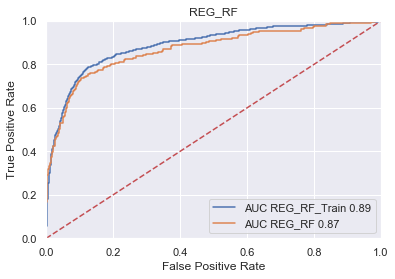

REG_RF CLASSIFICATION ACCURACY
REG_RF_Train  =  0.8770973154362416
REG_RF  =  0.8666107382550335
------


REG_RF RMSE ACCURACY
REG_RF_Train  =  4116.751171064979
REG_RF  =  4730.411757005278
------



Default
---------
Total Variables:  12
INTERCEPT  =  -4.778681295518277
M_DEBTINC  =  2.6958008174916164
TRUNC_IMP_DEBTINC  =  0.09638052518195159
TRUNC_IMP_CLAGE  =  -0.006504885840935598
TRUNC_LOAN  =  -7.33900416344886e-06
TRUNC_IMP_DELINQ  =  0.7163568900672946
TRUNC_IMP_MORTDUE  =  -1.0007218431931235e-06
TRUNC_IMP_VALUE  =  6.671162121542232e-07
TRUNC_IMP_CLNO  =  -0.012689412574037816
TRUNC_IMP_YOJ  =  -0.012289668693467898
TRUNC_IMP_DEROG  =  0.6635811090695206
TRUNC_IMP_NINQ  =  0.1046453376438063

Loss Amt
---------
Total Variables:  5
INTERCEPT  =  -15839.343085938335
TRUNC_LOAN  =  0.7724188017610201
TRUNC_IMP_CLNO  =  233.07760113646154
TRUNC_IMP_DEBTINC  =  218.31743246827963
M_DEBTINC  =  5444.177105397876


In [23]:
"""
REGRESSION RANDOM FOREST - Regression Model using the Random Forest model variables
"""

WHO = "REG_RF"


print("\n\n")
RF_flag = []
for i in vars_RF_flag :
    print(i)
    theVar = i[0]
    RF_flag.append( theVar )

print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    print(i)
    theVar = i[0]
    RF_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[RF_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[RF_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[RF_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# Loss Amt

AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_CLM_COEF = getCoefLogit( CLM, X_train[RF_flag] )
REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )

REG_RF_CLM = TEST_CLM.copy()
REG_RF_AMT = TEST_AMT.copy()




('M_DEBTINC', 100)
('TRUNC_IMP_DEBTINC', 30)
('TRUNC_IMP_CLAGE', 19)
('TRUNC_IMP_DELINQ', 16)
('M_VALUE', 7)
('TRUNC_IMP_DEROG', 6)
('TRUNC_LOAN', 6)
('TRUNC_IMP_VALUE', 6)



('TRUNC_LOAN', 100)
('TRUNC_IMP_CLNO', 11)
('TRUNC_IMP_DEBTINC', 5)
('M_DEBTINC', 5)


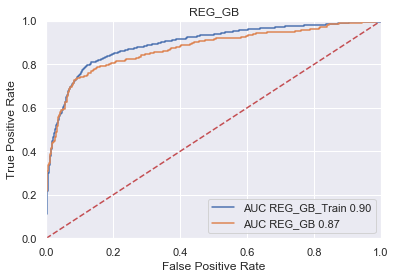

REG_GB CLASSIFICATION ACCURACY
REG_GB_Train  =  0.8798238255033557
REG_GB  =  0.87248322147651
------


REG_GB RMSE ACCURACY
REG_GB_Train  =  4116.751171064979
REG_GB  =  4730.411757005278
------



Default
---------
Total Variables:  9
INTERCEPT  =  -5.208565049387862
M_DEBTINC  =  2.6985066425002087
TRUNC_IMP_DEBTINC  =  0.10532405952028602
TRUNC_IMP_CLAGE  =  -0.007323217480724324
TRUNC_IMP_DELINQ  =  0.6709625409509762
M_VALUE  =  3.4771700353982435
TRUNC_IMP_DEROG  =  0.6811211734369641
TRUNC_LOAN  =  -8.112092843416792e-06
TRUNC_IMP_VALUE  =  -4.129584544029806e-07

Loss Amt
---------
Total Variables:  5
INTERCEPT  =  -15839.343085938335
TRUNC_LOAN  =  0.7724188017610201
TRUNC_IMP_CLNO  =  233.07760113646154
TRUNC_IMP_DEBTINC  =  218.31743246827963
M_DEBTINC  =  5444.177105397876


In [24]:
"""
REGRESSION GRADIENT BOOSTING - Regression model using the gradient boosting model variables
"""

WHO = "REG_GB"


print("\n\n")
GB_flag = []
for i in vars_GB_flag :
    print(i)
    theVar = i[0]
    GB_flag.append( theVar )

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )


CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( X_train[GB_flag], Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, X_train[GB_flag], Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, X_test[GB_flag], Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )


# Loss Amt

AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_CLM_COEF = getCoefLogit( CLM, X_train[GB_flag] )
REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_CLM = TEST_CLM.copy()
REG_GB_AMT = TEST_AMT.copy()

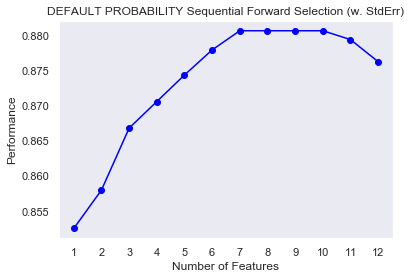

 ................... 
argmax
feature_names    (1, 2, 3, 4, 6, 7, 11)
avg_score                      0.880665
Name: 7, dtype: object
 ................... 
('1', '2', '3', '4', '6', '7', '11')


In [25]:
"""
REGRESSION STEPWISE
"""

U_train = X_train[ vars_tree_flag ]
stepVarNames = list( U_train.columns.values )
maxCols = U_train.shape[1]

sfs = SFS( LogisticRegression( solver='newton-cg', max_iter=100 ),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           cv=3
           )
sfs.fit(U_train.values, Y_train[ TARGET_F ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('DEFAULT PROBABILITY Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

In [26]:
finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

TRUNC_IMP_DELINQ
TRUNC_IMP_CLAGE
TRUNC_IMP_DEBTINC
M_VALUE
M_DEROG
M_DEBTINC
O_IMP_DELINQ


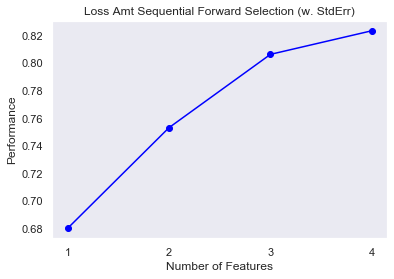

 ................... 
argmax
feature_names    (0, 1, 2, 3)
avg_score             0.82338
Name: 4, dtype: object
 ................... 
('0', '1', '2', '3')
TRUNC_LOAN
TRUNC_IMP_CLNO
TRUNC_IMP_DEBTINC
M_DEBTINC


In [27]:
U_train = X_train[ finalStepVars ]
U_test = X_test[ finalStepVars ]



V_train = W_train[ GB_amt ]
stepVarNames = list( V_train.columns.values )
maxCols = V_train.shape[1]

sfs = SFS( LinearRegression(),
           k_features=( 1, maxCols ),
           forward=True,
           floating=False,
           scoring = 'r2',
           cv=5
           )
sfs.fit(V_train.values, Z_train[ TARGET_A ].values)

theFigure = plot_sfs(sfs.get_metric_dict(), kind=None )
plt.title('Loss Amt Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

dfm = pd.DataFrame.from_dict( sfs.get_metric_dict()).T
dfm = dfm[ ['feature_names', 'avg_score'] ]
dfm.avg_score = dfm.avg_score.astype(float)

print(" ................... ")
maxIndex = dfm.avg_score.argmax()
print("argmax")
print( dfm.iloc[ maxIndex, ] )
print(" ................... ")

stepVars = dfm.iloc[ maxIndex, ]
stepVars = stepVars.feature_names
print( stepVars )

finalStepVars = []
for i in stepVars :
    index = int(i)
    try :
        theName = stepVarNames[ index ]
        finalStepVars.append( theName )
    except :
        pass

for i in finalStepVars :
    print(i)

V_train = W_train[ finalStepVars ]
V_test = W_test[ finalStepVars ]

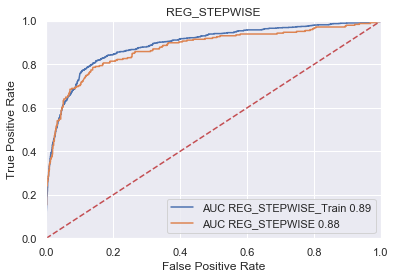

REG_STEPWISE CLASSIFICATION ACCURACY
REG_STEPWISE_Train  =  0.8819211409395973
REG_STEPWISE  =  0.8783557046979866
------




In [28]:
"""
REGRESSION 
"""

WHO = "REG_STEPWISE"

CLM = LogisticRegression( solver='newton-cg', max_iter=1000 )
CLM = CLM.fit( U_train, Y_train[ TARGET_F ] )

TRAIN_CLM = getProbAccuracyScores( WHO + "_Train", CLM, U_train, Y_train[ TARGET_F ] )
TEST_CLM = getProbAccuracyScores( WHO, CLM, U_test, Y_test[ TARGET_F ] )

print_ROC_Curve( WHO, [ TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY", [ TRAIN_CLM, TEST_CLM ] )

In [29]:
# Loss Amt

AMT = LinearRegression()
AMT = AMT.fit( V_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, V_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, V_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_STEP_CLM_COEF = getCoefLogit( CLM, U_train )
REG_STEP_AMT_COEF = getCoefLinear( AMT, V_train )

REG_STEP_CLM = TEST_CLM.copy()
REG_STEP_AMT = TEST_AMT.copy()

REG_STEPWISE RMSE ACCURACY
REG_STEPWISE_Train  =  4116.751171064979
REG_STEPWISE  =  4730.411757005278
------



Default
---------
Total Variables:  8
INTERCEPT  =  -5.173979007230326
TRUNC_IMP_DELINQ  =  0.6764763094872558
TRUNC_IMP_CLAGE  =  -0.007938157109029243
TRUNC_IMP_DEBTINC  =  0.10780906972818637
M_VALUE  =  3.729742636263478
M_DEROG  =  -0.8662145136879802
M_DEBTINC  =  2.7637632139765658
O_IMP_DELINQ  =  1.909509769188329

Loss Amt
---------
Total Variables:  5
INTERCEPT  =  -15839.343085938335
TRUNC_LOAN  =  0.7724188017610201
TRUNC_IMP_CLNO  =  233.07760113646154
TRUNC_IMP_DEBTINC  =  218.31743246827963
M_DEBTINC  =  5444.177105397876


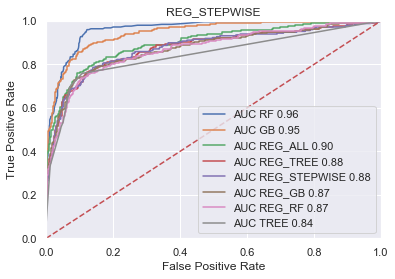

ALL CLASSIFICATION ACCURACY
RF  =  0.910234899328859
GB  =  0.9085570469798657
REG_TREE  =  0.8833892617449665
REG_ALL  =  0.8825503355704698
TREE  =  0.8808724832214765
REG_STEPWISE  =  0.8783557046979866
REG_GB  =  0.87248322147651
REG_RF  =  0.8666107382550335
------


ALL LOSS AMT MODEL ACCURACY
GB  =  3177.9937332803356
RF  =  3506.6713918019404
REG_ALL  =  3926.760224661266
REG_TREE  =  4398.331351097118
REG_RF  =  4730.411757005278
REG_GB  =  4730.411757005278
REG_STEPWISE  =  4730.411757005278
TREE  =  6135.514689615248
------




In [30]:
ALL_CLM = [ TREE_CLM, RF_CLM, GB_CLM, REG_ALL_CLM, REG_TREE_CLM, REG_RF_CLM, REG_GB_CLM, REG_STEP_CLM ]

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[4], reverse=True )
print_ROC_Curve( WHO, ALL_CLM ) 

ALL_CLM = sorted( ALL_CLM, key = lambda x: x[1], reverse=True )
print_Accuracy( "ALL CLASSIFICATION ACCURACY", ALL_CLM )


ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT, REG_STEP_AMT ]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL LOSS AMT MODEL ACCURACY", ALL_AMT )